# Intro

We compare the results for NRG Ljubljana code and NRG solver developed by Andreas Weichselbaum based on the QSpace tensor library. We are solving the single impurity Anderson model. We use the flat ('box-shaped') hybridization function.

Parameters used (most relevant listed):
- symmetries used: $SU(2)_\mathrm{charge} \otimes SU(2)_\mathrm{spin}$,
- discretization parameter $\Lambda = 1.7$,
- maximum number of kept states at each iteration: $N_\mathrm{keep} = 5000$,
- physical temperature: $T = 1.3533 \cdot 10^{-11}$ (i. e., ratio to the Kondo temperature is $T / T_K = 10^{-3}$),
- width of logarithmic Gaussian $\alpha = 0.45$,
- Gaussian convolution step parameter $\gamma = 0.15$.

# Results for the spectral function

We compare the self-energy improved spectral function of the impurity Green's function which is calculated from the computed self-energy as
$$
G(\omega) = \frac{1}{\omega - \varepsilon_d - \Delta(\omega) - \Sigma(\omega)}.
$$


In [1]:
import numpy as np
from h5 import HDFArchive
from triqs.gf import *
import model
from nrgljubljana_interface import MeshReFreqPts

# import results for nrgljubljana_interface
with HDFArchive('results/nrgljubljana_interface.h5', 'r') as archive:
    A_w = archive['A_w']['imp']
    Sigma_w = archive['Sigma_w']['imp']
    Delta_w = archive['Delta_w']['imp']
    F_l_w = archive['F_l_w']['imp']
    F_r_w = archive['F_r_w']['imp']
    G_w = archive['G_w']['imp']
    I_w = archive['I_w']['imp']

# constants
TK = model.TK
V = model.V
U = model.U

# omega mesh for nrgljubljana_interface results
w = np.array([p for p in A_w.mesh.values()])

# note that eps term is already included in the self-energy
Gself_w = 1 / (w - Delta_w.data[:, 0][:, 0] - Sigma_w.data[:, 0][:, 0])
Aself_w = (-1 / np.pi) * Gself_w.imag

# TODO: import results for NRG Munich code
# Stored in a MATLAB .mat file
import scipy.io

QSpace_mat_file = 'results/NRG_QSpace_benchmark.mat'
QSpace_data = scipy.io.loadmat(QSpace_mat_file, squeeze_me=True)

Starting serial run at: 2025-01-22 10:48:03.018361
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: Use

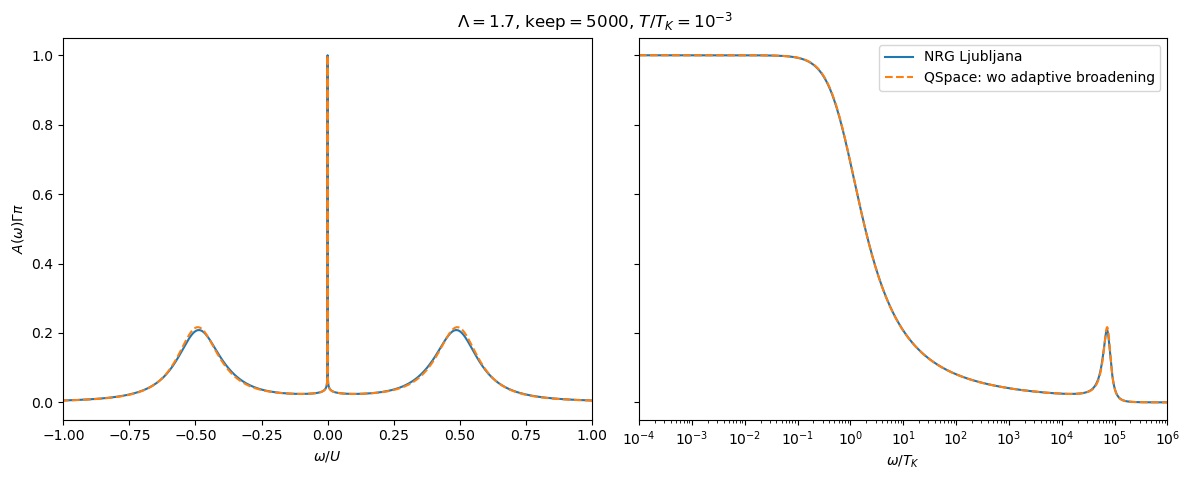

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

# ax[0].plot(w / U, A_w.data[:, 0].real * V * np.pi, "-", label=r"$A^{\mathrm{raw}}$")
ax[0].plot(w / U, Aself_w * V * np.pi, "-", label=r"NRG Ljubljana")
# ax[0].plot(QSpace_data['w'] / U, QSpace_data['Aimp'] * V * np.pi, "--", label=r"QSpace")
ax[0].plot(QSpace_data['w'].flatten() / U, QSpace_data['Aimp_wo_adap_broad'].flatten() * V * np.pi, "--", label=r"QSpace: wo adaptive broadening$")


ax[0].set_xlim(-1, 1)

ax[0].set_xlabel("$\omega / U $")
ax[0].set_ylabel("$A(\omega) \Gamma \pi$")

# ax[1].plot(w / TK, A_w.data[:, 0].real * V * np.pi, "-", label=r"$A^{\mathrm{raw}}$")
ax[1].plot(w / TK,  Aself_w * V * np.pi, "-", label=r"NRG Ljubljana")
# ax[1].plot(QSpace_data['w'] / TK, QSpace_data['Aimp'] * V * np.pi, "--", label=r"QSpace")
ax[1].plot(QSpace_data['w'].flatten() / TK, QSpace_data['Aimp_wo_adap_broad'].flatten() * V * np.pi, "--", label=r"QSpace: wo adaptive broadening")


ax[1].set_xlim(1e-4, 1e6)
ax[1].set_xscale("log")

ax[1].set_xlabel("$\omega / T_K $")
ax[1].legend()

fig.suptitle(r"$\Lambda = 1.7$, $\mathrm{keep} = 5000$, $T/T_K = 10^{-3}$", y=0.95)
fig.tight_layout()

# Results for the self-energy

In both solvers the self-energy is calculated using the recently introduced symmetric improved estimators (see PRB **105**, 245132 (2022) for a detailed explanation).

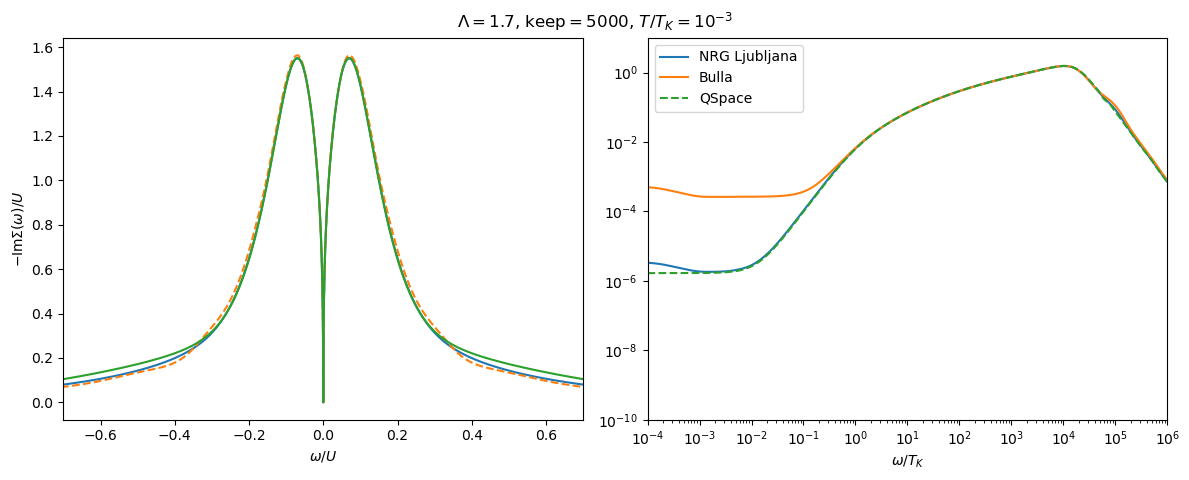

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

ax[0].plot(w / U, -Sigma_w.data[:, 0, 0].imag / U)
ax[0].plot(QSpace_data['w'] / U, -QSpace_data['SE'].imag / U, "--")

Sigma_Bulla = F_l_w * G_w.inverse()

ax[0].plot(w / U, -Sigma_Bulla.data[:, 0, 0].imag / U)

ax[1].plot(w / TK, -Sigma_w.data[:, 0, 0].imag / U, label=r"NRG Ljubljana")
ax[1].plot(w / TK, -Sigma_Bulla.data[:, 0, 0].imag / U, label=r"Bulla")
ax[1].plot(QSpace_data['w'] / TK, -QSpace_data['SE'].imag / U, "--", label=r"QSpace")
# ax[1].plot(w / TK, (0.1 * w / TK)**2, "--")

ax[0].set_xlim(-0.7, 0.7)
ax[0].set_xlabel("$\omega / U $")
ax[0].set_ylabel("$-\mathrm{Im} \Sigma(\omega) / U$")

ax[1].set_xlim(1e-4, 1e6)
ax[1].set_ylim(1e-10, 10.)
ax[1].set_xlabel("$\omega / T_K $")
# ax[1].set_ylabel("$-\mathrm{Im} \Sigma(\omega) / U$")

# ax[1].annotate(r'$\sim (\omega / T_K)^2$', xy=(2, 1), xytext=(3e-2, 1e-6))
ax[1].set_yscale("log")
ax[1].set_xscale("log")

ax[1].legend()

fig.suptitle(r"$\Lambda = 1.7$, $\mathrm{keep} = 5000$, $T/T_K = 10^{-3}$", y=0.95)
fig.tight_layout()

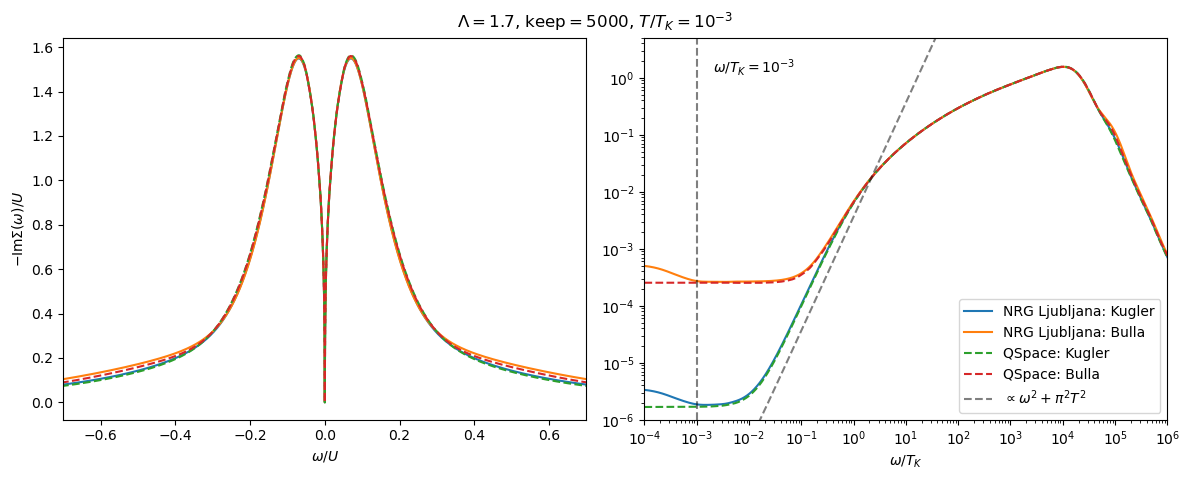

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

Sigma_Bulla = F_l_w * G_w.inverse()
ax[0].plot(w / U, -Sigma_w.data[:, 0, 0].imag / U)
ax[0].plot(w / U, -Sigma_Bulla.data[:, 0, 0].imag / U)
ax[0].plot(QSpace_data['w'] / U, -QSpace_data['SE_wo_adap_broad'].imag / U, "--")
ax[0].plot(QSpace_data['w'] / U, -QSpace_data['SE_Bulla_wo_adap_broad'].imag / U, "--")

T = 1e-3 * TK

ax[1].plot(w / TK, -Sigma_w.data[:, 0, 0].imag / U, label=r"NRG Ljubljana: Kugler")
ax[1].plot(w / TK, -Sigma_Bulla.data[:, 0, 0].imag / U, label=r"NRG Ljubljana: Bulla")
ax[1].plot(QSpace_data['w'] / TK, -QSpace_data['SE_wo_adap_broad'].imag / U, "--", label=r"QSpace: Kugler")
ax[1].plot(QSpace_data['w'] / TK, -QSpace_data['SE_Bulla_wo_adap_broad'].imag / U, "--", label=r"QSpace: Bulla")
ax[1].plot(w / TK, 2e13*(w ** 2 + np.pi**2 * T**2), "k--", alpha=0.5, label=r"$\propto \omega^2 + \pi^2 T^2$")
# ax[1].plot(w / TK, (0.1 * w / TK)**2, "--")

ax[0].set_xlim(-0.7, 0.7)
ax[0].set_xlabel("$\omega / U $")
ax[0].set_ylabel("$-\mathrm{Im} \Sigma(\omega) / U$")

ax[1].set_xlim(1e-4, 1e6)
ax[1].set_ylim(1e-10, 10.)
ax[1].set_xlabel("$\omega / T_K $")
# ax[1].set_ylabel("$-\mathrm{Im} \Sigma(\omega) / U$")

# ax[1].annotate(r'$\sim (\omega / T_K)^2$', xy=(2, 1), xytext=(3e-2, 1e-6))
ax[1].set_yscale("log")
ax[1].set_xscale("log")

ax[1].set_ylim(1e-6, 5.)

ax[1].axvline(1e-3, color="black", linestyle="--", alpha=0.5)
ax[1].text(2e-3, 1, r"$\omega/T_K = 10^{-3}$", verticalalignment="bottom")

ax[1].legend()

fig.suptitle(r"$\Lambda = 1.7$, $\mathrm{keep} = 5000$, $T/T_K = 10^{-3}$", y=0.95)
fig.tight_layout()